In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
import umap
import time

In [2]:
# We load the MNIST dataset below
mnist = fetch_openml('Fashion-MNIST', version=1, cache=True)

In [3]:
np.random.seed(123)

indices = np.random.choice(70000,1000)
X = mnist.data[indices] / 255.0
y = mnist.target[indices]

print(X.shape, y.shape)

(1000, 784) (1000,)


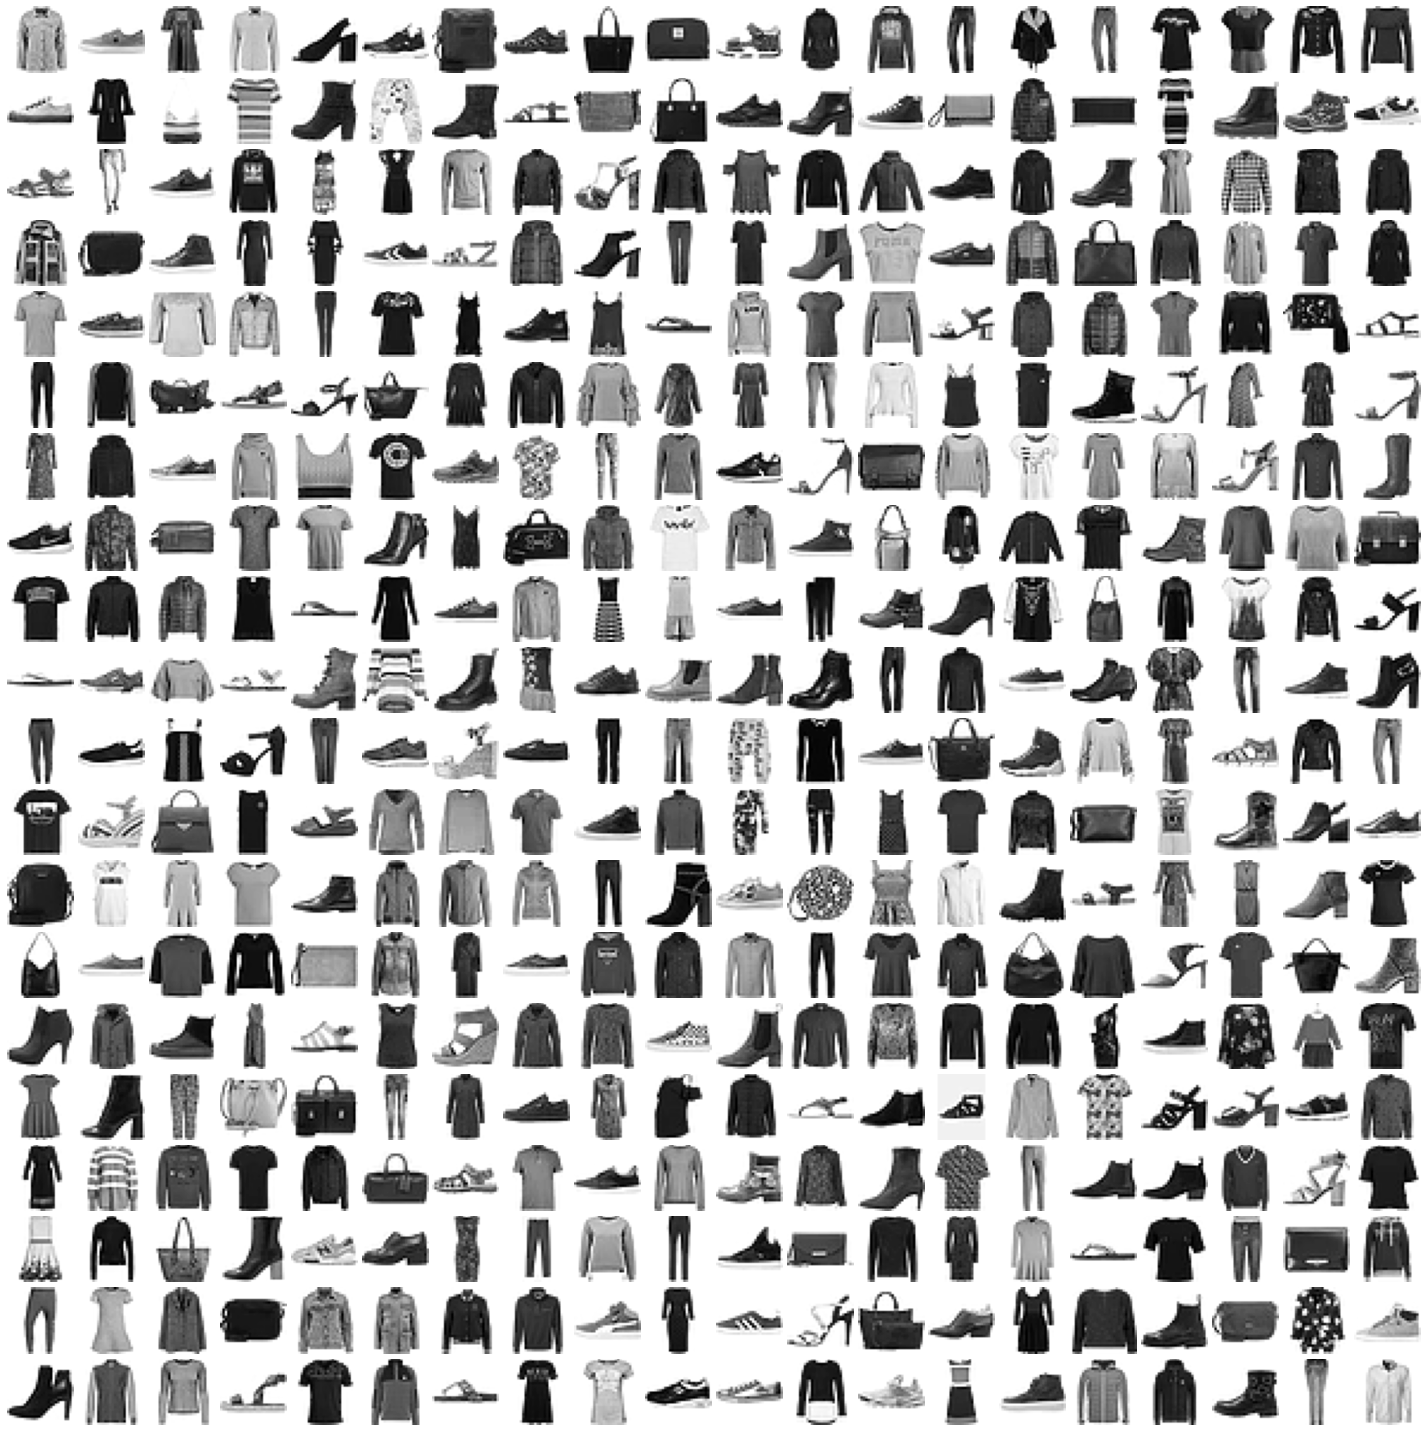

In [4]:
## Plot a 20 x 20 representation of some of our data

fig, ax_array = plt.subplots(20,20, figsize=(20,20))
axes = ax_array.flatten()
for i, ax in enumerate(axes):
    ax.imshow(X[i].reshape(28,28), cmap = 'gray_r')

plt.setp(axes, xticks = [], yticks = [], frame_on = False)
plt.tight_layout(h_pad = .5, w_pad = .01)

In [5]:
time_start = time.time()

umap_results = umap.UMAP(n_neighbors=7,
                      min_dist=1,
                      metric='correlation').fit_transform(X)

print('UMAP done! Time elapsed: {} seconds'.format(time.time()-time_start))

UMAP done! Time elapsed: 10.354069709777832 seconds


Text(0.5, 1.0, 'UMAP')

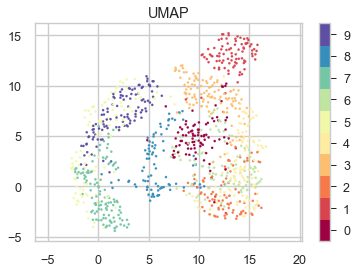

In [6]:
## For plotting purposes, we need to convert the string y targets to integers for plotting purposes
y_int = [int(ii) for ii in y]

## Check plotting as suggested by UMAP documentation
import seaborn as sns
sns.set_style('whitegrid')
plt.scatter(umap_results[:,0], umap_results[:,1], c = y_int, cmap = 'Spectral', s = 5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP')

In [7]:
## How about an interactive plot?
from io import BytesIO
from PIL import Image
import base64

from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool, ColumnDataSource, CategoricalColorMapper
from bokeh.palettes import Spectral10

In [8]:
def embeddable_image(data):
    #img_data = 255 - 15 * data.astype(np.uint8)
    #img_data = data.astype(np.uint8)
    #img_data = data
    img_data = (255 - 255*data).astype(np.uint8)
    image = Image.fromarray(img_data, mode='L').resize((64, 64), Image.BICUBIC)
    buffer = BytesIO()
    image.save(buffer, format='png')
    for_encoding = buffer.getvalue()
    return 'data:image/png;base64,' + base64.b64encode(for_encoding).decode()

In [9]:
df = pd.DataFrame(umap_results, columns=('x', 'y'))
df['digit'] = y

In [10]:
X_reshaped = [i.reshape(28,28) for i in X]
df['image'] = list(map(embeddable_image, X_reshaped))

In [ ]:
df

In [11]:
## Bokeh plot
## This generates the UMAP plot itself, with a custom hover tooltip that embeds the image of the fashion item in question in it, along with the item class that that item is actually from.

datasource = ColumnDataSource(df)
color_mapping = CategoricalColorMapper(factors=[str(9 - int(x)) for x in np.unique(y)],
                                       palette=Spectral10)

plot_figure = figure(
    title='UMAP projection of the Fashion dataset',
    plot_width=1000,
    plot_height=1000,
    tools=('pan, wheel_zoom, reset')
)

plot_figure.add_tools(HoverTool(tooltips="""
<div>
    <div>
        <img src='@image' style='float: left; margin: 5px 5px 5px 5px'/>
    </div>
    <div>
        <span style='font-size: 16px; color: #224499'>Digit:</span>
        <span style='font-size: 18px'>@digit</span>
    </div>
</div>
"""))

plot_figure.circle(
    'x',
    'y',
    source=datasource,
    color=dict(field='digit', transform=color_mapping),
    line_alpha=0.6,
    fill_alpha=0.6,
    size=4
)
show(plot_figure)

In [ ]:
np.unique(y)

In [ ]:
## Plot a 20 x 20 representation of some of our data: this is just a check for the reshaped data X_reshaped

fig, ax_array = plt.subplots(20,20, figsize=(20,20))
axes = ax_array.flatten()
for i, ax in enumerate(axes):
    ax.imshow(X_reshaped[i], cmap = 'gray_r')

plt.setp(axes, xticks = [], yticks = [], frame_on = False)
plt.tight_layout(h_pad = .5, w_pad = .01)
